-Load ‘load_breast_cancer’ dataset from sklearn.datasets.

In [5]:
import pandas as pd
import numpy as np
from sklearn import datasets
cancer_data = datasets.load_breast_cancer()

Print the names of the features and labels.

In [2]:
cancer_data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [3]:
cancer_data.target_names

array(['malignant', 'benign'], dtype='<U9')

Converting sklearn to pandas dataframe

In [7]:
data = np.c_[cancer_data.data, cancer_data.target]
columns = np.append(cancer_data.feature_names, ["target"])
df =  pd.DataFrame(data, columns=columns)

Shape of the data

In [12]:
df.shape

(569, 31)

First 5 records

In [13]:
df.head(n=5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


Printing the target values

In [16]:
df['target']

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
564    0.0
565    0.0
566    0.0
567    0.0
568    1.0
Name: target, Length: 569, dtype: float64

Splitting the data (70-30)

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cancer_data.data, cancer_data.target, test_size=0.3,random_state=44)

<b>Implementing SVM

In [54]:
from sklearn import svm
Classifier = svm.SVC(kernel='linear')
Classifier.fit(X_train, y_train)
y_pred = Classifier.predict(X_test)

In [22]:
from sklearn import metrics
print("Accuracy of the model is",metrics.accuracy_score(y_test, y_pred))

Accuracy of the model is 0.9649122807017544


In [27]:
print("Precision of the model is",metrics.precision_score(y_test, y_pred))
print("Recall os the model is",metrics.recall_score(y_test, y_pred))

Precision of the model is 0.9636363636363636
Recall os the model is 0.9814814814814815


<i>Recall metric determines the ratio of number of true positive predictions made to the total number of positive predictions including both true positive and false negatives

<b>Implementing Logistic Regression </b>

In [53]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=5000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96        63
           1       0.96      0.99      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



In [48]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[ 59,   4],
       [  1, 107]], dtype=int64)

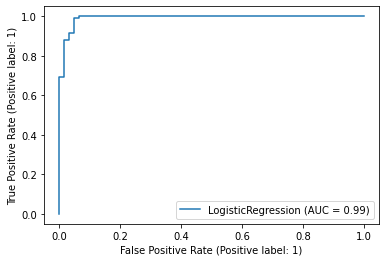

In [52]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(logreg,X_test,y_test)